<a href="https://colab.research.google.com/github/VishnuReddy25/DataStructure/blob/main/MLSEM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy
from sklearn.preprocessing import StandardScaler

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Experiment 1.1 FS**

In [ ]:
import sklearn
import pandas as pd
import numpy
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("/content/Qinspection.csv")
print("Dataframe \n\n",df.head())
print("---------------------------------------------------------------------------------------------")
#df.info()
print("dataframe columns \n\n",df.columns,"\n")
print("---------------------------------------------------------------------------------------------")
predictor_features=df.iloc[:,0:6]
print("Predicted _Features \n\n",predictor_features.head(),"\n")
print("---------------------------------------------------------------------------------------------")
class_variable=df.iloc[:,-1]
print("Class Variable \n\n",class_variable.head(),"\n")
print("---------------------------------------------------------------------------------------------")
std_predictor_features=StandardScaler().fit_transform(predictor_features)
new_df=pd.DataFrame(std_predictor_features,columns=predictor_features.columns)
print("Data Frame After Standardisation \n\n",new_df.head())
print("---------------------------------------------------------------------------------------------")
abs_cor_matrix=new_df.corr().abs()
print("Absolute Correlation Matrix \n\n",abs_cor_matrix)
print("---------------------------------------------------------------------------------------------")
upper_cor_matrix=abs_cor_matrix.where(numpy.triu(numpy.ones(abs_cor_matrix.shape),k=1).astype(bool))
print("Upper Correlation Matrix \n\n",upper_cor_matrix)
print("---------------------------------------------------------------------------------------------")
to_drop=[column for column in upper_cor_matrix.columns if any(upper_cor_matrix[column]>0.95)]
print("Columns to be dropped based on correlation are :\n\n",to_drop)
print("---------------------------------------------------------------------------------------------")
new_df1=new_df.drop(new_df[to_drop],axis=1)
print("Data Frame After Dropping Columns \n\n",new_df1.head())
print("---------------------------------------------------------------------------------------------")
merged_df=pd.concat([new_df1,class_variable],axis=1)
print("Final Data Frame \n\n",merged_df.head())
print("---------------------------------------------------------------------------------------------")

Dataframe 

    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
dataframe columns 

 Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'class'],
      dtype='object') 

---------------------------------------------------------------------------------------------
Predicted _Features 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4

# **CELL BY CELL**

In [ ]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  144 non-null    float64
 1   feature2  144 non-null    float64
 2   feature3  144 non-null    float64
 3   feature4  144 non-null    float64
 4   feature5  144 non-null    float64
 5   feature6  144 non-null    float64
 6   class     144 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.0+ KB


In [ ]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,6.052083,5.852083,3.054861,3.764583,1.199306,1.299306
std,0.838161,0.838161,0.441996,1.769575,0.761623,0.761623
min,4.500000,4.300000,2.000000,1.000000,0.100000,0.200000
25%,5.300000,5.100000,2.800000,1.600000,0.300000,0.400000
50%,6.000000,5.800000,3.000000,4.350000,1.300000,1.400000
75%,6.600000,6.400000,3.300000,5.100000,1.800000,1.900000
max,8.100000,7.900000,4.400000,6.900000,2.500000,2.600000


In [ ]:
df.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'class'],
      dtype='object')

In [ ]:
predictor_features=df.iloc[:,0:6]
predictor_features

,feature1,feature2,feature3,feature4,feature5,feature6
0,4.9,4.7,3.2,1.3,0.2,0.3
1,4.8,4.6,3.1,1.5,0.2,0.3
2,5.2,5.0,3.6,1.4,0.2,0.3
3,5.6,5.4,3.9,1.7,0.4,0.5
4,4.8,4.6,3.4,1.4,0.3,0.4
...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4
140,6.9,6.7,3.3,5.7,2.5,2.6
141,6.9,6.7,3.0,5.2,2.3,2.4
142,6.5,6.3,2.5,5.0,1.9,2.0


In [ ]:
class_variable=df.iloc[:,-1]
class_variable


,class
0,A
1,A
2,A
3,A
4,A
...,...
139,C
140,C
141,C
142,C


In [ ]:
std_predictor_features=StandardScaler().fit_transform(predictor_features)


array([[-1.37933547e+00, -1.37933547e+00,  3.29517350e-01,
        -1.39761599e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.49906079e+00, -1.49906079e+00,  1.02481473e-01,
        -1.28419998e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.02015951e+00, -1.02015951e+00,  1.23766086e+00,
        -1.34090799e+00, -1.31665361e+00, -1.31665361e+00],
       [-5.41258222e-01, -5.41258222e-01,  1.91876849e+00,
        -1.17078398e+00, -1.05313989e+00, -1.05313989e+00],
       [-1.49906079e+00, -1.49906079e+00,  7.83589106e-01,
        -1.34090799e+00, -1.18489675e+00, -1.18489675e+00],
       [-1.02015951e+00, -1.02015951e+00,  7.83589106e-01,
        -1.28419998e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.73851143e+00, -1.73851143e+00, -3.51590283e-01,
        -1.34090799e+00, -1.31665361e+00, -1.31665361e+00],
       [-1.13988483e+00, -1.13988483e+00,  1.02481473e-01,
        -1.28419998e+00, -1.44841047e+00, -1.44841047e+00],
       [-5.41258222e-01, -5.41258222e-01,  1.464

In [ ]:
new_df=pd.DataFrame(std_predictor_features,columns=predictor_features.columns)
new_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,-1.379335,-1.379335,0.329517,-1.397616,-1.316654,-1.316654
1,-1.499061,-1.499061,0.102481,-1.284200,-1.316654,-1.316654
2,-1.020160,-1.020160,1.237661,-1.340908,-1.316654,-1.316654
3,-0.541258,-0.541258,1.918768,-1.170784,-1.053140,-1.053140
4,-1.499061,-1.499061,0.783589,-1.340908,-1.184897,-1.184897
...,...,...,...,...,...,...
139,1.134896,1.134896,0.329517,1.210952,1.450240,1.450240
140,1.015171,1.015171,0.556553,1.097536,1.713754,1.713754
141,1.015171,1.015171,-0.124554,0.813996,1.450240,1.450240
142,0.536270,0.536270,-1.259734,0.700580,0.923213,0.923213


In [ ]:
cor_matrix=new_df.corr()
print(cor_matrix)

          feature1  feature2  feature3  feature4  feature5  feature6
feature1  1.000000  1.000000 -0.116306  0.871991  0.819242  0.819242
feature2  1.000000  1.000000 -0.116306  0.871991  0.819242  0.819242
feature3 -0.116306 -0.116306  1.000000 -0.434256 -0.374636 -0.374636
feature4  0.871991  0.871991 -0.434256  1.000000  0.962737  0.962737
feature5  0.819242  0.819242 -0.374636  0.962737  1.000000  1.000000
feature6  0.819242  0.819242 -0.374636  0.962737  1.000000  1.000000


In [ ]:
abs_cor_matrix=new_df.corr().abs()
print(abs_cor_matrix)

          feature1  feature2  feature3  feature4  feature5  feature6
feature1  1.000000  1.000000  0.116306  0.871991  0.819242  0.819242
feature2  1.000000  1.000000  0.116306  0.871991  0.819242  0.819242
feature3  0.116306  0.116306  1.000000  0.434256  0.374636  0.374636
feature4  0.871991  0.871991  0.434256  1.000000  0.962737  0.962737
feature5  0.819242  0.819242  0.374636  0.962737  1.000000  1.000000
feature6  0.819242  0.819242  0.374636  0.962737  1.000000  1.000000


In [ ]:
upper_cor_matrix=abs_cor_matrix.where(numpy.triu(numpy.ones(abs_cor_matrix.shape),k=1).astype(bool))
print(upper_cor_matrix)

          feature1  feature2  feature3  feature4  feature5  feature6
feature1       NaN       1.0  0.116306  0.871991  0.819242  0.819242
feature2       NaN       NaN  0.116306  0.871991  0.819242  0.819242
feature3       NaN       NaN       NaN  0.434256  0.374636  0.374636
feature4       NaN       NaN       NaN       NaN  0.962737  0.962737
feature5       NaN       NaN       NaN       NaN       NaN  1.000000
feature6       NaN       NaN       NaN       NaN       NaN       NaN


In [ ]:
to_drop=[column for column in upper_cor_matrix.columns if any(upper_cor_matrix[column]>0.95)]
print(to_drop)

['feature2', 'feature5', 'feature6']


In [ ]:
new_df1=new_df.drop(new_df[to_drop],axis=1)
new_df1

,feature1,feature3,feature4
0,-1.379335,0.329517,-1.397616
1,-1.499061,0.102481,-1.284200
2,-1.020160,1.237661,-1.340908
3,-0.541258,1.918768,-1.170784
4,-1.499061,0.783589,-1.340908
...,...,...,...
139,1.134896,0.329517,1.210952
140,1.015171,0.556553,1.097536
141,1.015171,-0.124554,0.813996
142,0.536270,-1.259734,0.700580


In [ ]:
merged_df=pd.concat([new_df1,class_variable],axis=1)
merged_df

,feature1,feature3,feature4,class
0,-1.379335,0.329517,-1.397616,A
1,-1.499061,0.102481,-1.284200,A
2,-1.020160,1.237661,-1.340908,A
3,-0.541258,1.918768,-1.170784,A
4,-1.499061,0.783589,-1.340908,A
...,...,...,...,...
139,1.134896,0.329517,1.210952,C
140,1.015171,0.556553,1.097536,C
141,1.015171,-0.124554,0.813996,C
142,0.536270,-1.259734,0.700580,C


# **EXPERIMENT -1.2 FS**

In [ ]:
import sklearn
import pandas as pd
import numpy
from sklearn.feature_selection import mutual_info_classif
exp2df=pd.read_csv("/content/Qinspection.csv")
print("Dataframe \n",df.head())
print("---------------------------------------------------------------------------------------------")
predictors=exp2df.iloc[:,0:6]
target=exp2df.iloc[:,-1]
print("Predictors \n\n",predictors.head())
print("---------------------------------------------------------------------------------------------")
print("Target \n\n",target.head())
print("---------------------------------------------------------------------------------------------")
Mutual_information=mutual_info_classif(predictors,target)
print("Mutual Information \n\n",Mutual_information)
print("---------------------------------------------------------------------------------------------")
features=exp2df.columns
print("Features \n\n",features)
print("---------------------------------------------------------------------------------------------")
print("Features alongwith Mutual Information \n\n")
for feature in zip(features,Mutual_information):
  display(feature)
print("---------------------------------------------------------------------------------------------")
final_feturs=[]
for feature in zip(features,Mutual_information):
  if feature[1]>0.5:
    final_feturs.append(feature[0])
print("Final Features with threshold greater than 0.5 \n")
print(final_feturs)
print("---------------------------------------------------------------------------------------------")
finaldf=exp2df[final_feturs]
finaldf=pd.concat([finaldf,target],axis=1)
print("Final Data Frame \n\n",finaldf.head())
print("---------------------------------------------------------------------------------------------")

Dataframe 
    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
Predictors 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4       0.2       0.3
3       5.6       5.4       3.9       1.7       0.4       0.5
4       4.8       4.6       3.4       1.4       0.3       0.4
---------------------------------------------------------------------------------------------
Target

('feature1', 0.4851436271435907)

('feature2', 0.5262114595526519)

('feature3', 0.2512474944465979)

('feature4', 0.9889994390049817)

('feature5', 0.9798106820132253)

('feature6', 0.9860086297682467)

---------------------------------------------------------------------------------------------
Final Features with threshold greater than 0.5 

['feature2', 'feature4', 'feature5', 'feature6']
---------------------------------------------------------------------------------------------
Final Data Frame 

    feature2  feature4  feature5  feature6 class
0       4.7       1.3       0.2       0.3     A
1       4.6       1.5       0.2       0.3     A
2       5.0       1.4       0.2       0.3     A
3       5.4       1.7       0.4       0.5     A
4       4.6       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------


# **CELL BY CELL**

In [ ]:
exp2df=pd.read_csv("Qinspection.csv")

In [ ]:
exp2df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A


In [ ]:
predictors=exp2df.iloc[:,0:6]
target=exp2df.iloc[:,-1]

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
Mutual_information=mutual_info_classif(predictors,target)

In [ ]:
Mutual_information

array([0.49315618, 0.50296187, 0.21909203, 0.98795666, 0.97194183,
       0.97912241])

In [ ]:
features=exp2df.columns
features


Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'class'],
      dtype='object')

In [ ]:
for feature in zip(features,Mutual_information):
    display(feature)

('feature1', 0.49315618107319925)

('feature2', 0.5029618686796038)

('feature3', 0.2190920330760453)

('feature4', 0.9879566591357569)

('feature5', 0.9719418267912678)

('feature6', 0.9791224137278853)

In [ ]:
final_feturs=[]
for feature in zip(features,Mutual_information):
  if feature[1]>0.5:
    final_feturs.append(feature[0])
print(final_feturs)

['feature2', 'feature4', 'feature5', 'feature6']


# **Experiment 1.3 using variance**

In [ ]:
from typing import final
import sklearn
import pandas as pd
import numpy
from sklearn.feature_selection import VarianceThreshold
exp3df=pd.read_csv("/content/Qinspection.csv")
print("Dataframe \n",exp3df.head())
print("---------------------------------------------------------------------------------------------")
predictors=exp3df.iloc[:,0:6]
target=exp3df.iloc[:,-1]
print("Predictors \n\n",predictors.head())
print("---------------------------------------------------------------------------------------------")
print("Target \n\n",target.head())
print("---------------------------------------------------------------------------------------------")
features=exp3df.columns
print("Features \n\n",features)
print("---------------------------------------------------------------------------------------------")
selector = VarianceThreshold(threshold=.6)
selector.fit(predictors)
selector_predictor=selector.fit_transform(predictors)
print("Selector Predictor \n",selector_predictor[:5])
print("---------------------------------------------------------------------------------------------")
print("features along with their variance \n")
for s in zip(features,selector.variances_):
  display(s)

print("---------------------------------------------------------------------------------------------")
remaining_features = predictors.columns[selector.get_support()]
print("Features with Threshold 0.6 \n",remaining_features)
print("---------------------------------------------------------------------------------------------")
finaldf=exp3df[remaining_features]
finaldf=pd.concat([finaldf,target],axis=1)
print("Final Data Frame \n",finaldf.head())
print("---------------------------------------------------------------------------------------------")

Dataframe 
    feature1  feature2  feature3  feature4  feature5  feature6 class
0       4.9       4.7       3.2       1.3       0.2       0.3     A
1       4.8       4.6       3.1       1.5       0.2       0.3     A
2       5.2       5.0       3.6       1.4       0.2       0.3     A
3       5.6       5.4       3.9       1.7       0.4       0.5     A
4       4.8       4.6       3.4       1.4       0.3       0.4     A
---------------------------------------------------------------------------------------------
Predictors 

    feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4       0.2       0.3
3       5.6       5.4       3.9       1.7       0.4       0.5
4       4.8       4.6       3.4       1.4       0.3       0.4
---------------------------------------------------------------------------------------------
Target

('feature1', 0.6976345486111111)

('feature2', 0.6976345486111113)

('feature3', 0.19400414737654317)

('feature4', 3.1096484375)

('feature5', 0.5760411844135802)

('feature6', 0.5760411844135803)

---------------------------------------------------------------------------------------------
Features with Threshold 0.6 
 Index(['feature1', 'feature2', 'feature4'], dtype='object')
---------------------------------------------------------------------------------------------
Final Data Frame 
    feature1  feature2  feature4 class
0       4.9       4.7       1.3     A
1       4.8       4.6       1.5     A
2       5.2       5.0       1.4     A
3       5.6       5.4       1.7     A
4       4.8       4.6       1.4     A
---------------------------------------------------------------------------------------------


In [ ]:
predictors=exp3df.iloc[:,0:6]
target=exp3df.iloc[:,-1]

In [ ]:
selector=VarianceThreshold(threshold=0.6)
selector.fit(predictors)
# predictor_selector=selector.fit_transform(predictors)
print(selector.variances_)
for i in selector.variances_:
  if i>0.6:
    print(i)

[0.69763455 0.69763455 0.19400415 3.10964844 0.57604118 0.57604118]
0.6976345486111111
0.6976345486111113
3.1096484375


In [ ]:
selector = VarianceThreshold(threshold=.6)
selector.fit(predictors)

VarianceThreshold(threshold=0.6)

In [ ]:
selector_predictor=selector.fit_transform(predictors)

In [ ]:
selector_predictor[:5]

array([[4.9, 4.7, 1.3],
       [4.8, 4.6, 1.5],
       [5.2, 5. , 1.4],
       [5.6, 5.4, 1.7],
       [4.8, 4.6, 1.4]])

In [ ]:
for s in zip(features,selector.variances_):
  display(s)

('feature1', 0.6976345486111111)

('feature2', 0.6976345486111113)

('feature3', 0.19400414737654317)

('feature4', 3.1096484375)

('feature5', 0.5760411844135802)

('feature6', 0.5760411844135803)

In [ ]:
remaining_features = predictors.columns[selector.get_support()]
remaining_features

Index(['feature1', 'feature2', 'feature4'], dtype='object')

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


# **FS-CoE-Cardata.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import pandas as pd
import numpy as np
cardata= pd.read_csv("/content/auto-mpg (1).csv")
print("car data \n")
df=pd.DataFrame(cardata)
display(df.head(2))
print("------------------------------------------------------------------------------------------------------")
cardata['horsepower'] = pd.to_numeric(cardata['horsepower'], errors='coerce').fillna(0).astype(int)
carname= cardata.iloc[:, 8].values
labelencoder = LabelEncoder()
carname= labelencoder.fit_transform(carname)
predictors= cardata.iloc[:,1:8]
target=cardata.iloc[:,0].values
X=cardata.iloc[:,0:8]
X['car name'] = carname
X['mpg'] = target
df2=pd.DataFrame(X)
print("after label encoding \n")
display(X.head(2))
print("---------------------------------------------------------------------------------------------------")
Impfeatures = X.drop("mpg", axis=1).apply(lambda x: x.corr(X.mpg))
indices = np.argsort(Impfeatures)
columns=df2.columns
print("features along with their corelation\n",Impfeatures)
print("---------------------------------------------------------------------------------------------------")
print("LIST OF IMPORTANT FEATURES \n")
required_features=[]
for i in range(0, len(indices)):
    if np.abs(Impfeatures.iloc[i])>0.5:
        print(columns[i])
        required_features.append(columns[i])

print("---------------------------------------------------------------------------------------------------")
newdf=df2[required_features]
# newdf=pd.concat([newdf,target],axis=1)
print("final data frame \n")
display(newdf.head())

car data 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


------------------------------------------------------------------------------------------------------
after label encoding 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36


---------------------------------------------------------------------------------------------------
features along with their corelation
 cylinders      -0.775396
displacement   -0.804203
horsepower     -0.754276
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
car name        0.273936
dtype: float64
---------------------------------------------------------------------------------------------------
LIST OF IMPORTANT FEATURES 

mpg
cylinders
displacement
horsepower
acceleration
model year
---------------------------------------------------------------------------------------------------
final data frame 



,mpg,cylinders,displacement,horsepower,acceleration,model year
0,18.0,8,307.0,130,12.0,70
1,15.0,8,350.0,165,11.5,70
2,18.0,8,318.0,150,11.0,70
3,16.0,8,304.0,150,12.0,70
4,17.0,8,302.0,140,10.5,70


# **FS-Kbest-Chi2**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris_dataset=pd.read_csv("/content/Iris.csv")
df=pd.DataFrame(iris_dataset)
print("iris dataset \n")
display(df.head())
print("-----------------------------------------------------------------------------------------")
features = iris_dataset.iloc[:,1:5]
target = iris_dataset.iloc[:,-1]
chi2_features = SelectKBest(chi2, k = 2)
kbest_features = chi2_features.fit_transform(features, target)

# Reduced features
print('Original feature number:', features.shape[1])
print('Reduced feature number:', kbest_features.shape[1])
print("-------------------------------------------------------------------------------------------")
print("scores for the features \n")
for i in range(len(chi2_features.scores_)):
  print('Feature %d: %f' % (i, chi2_features.scores_[i]))
print("-------------------------------------------------------------------------------------------")
print("selected features \n")
selectedfetures=chi2_features.get_feature_names_out()
print(selectedfetures)
print("-------------------------------------------------------------------------------------------")
newdf=iris_dataset[selectedfetures]
newdf=pd.concat([newdf,target],axis=1)
print("final data frame \n")
display(newdf.head())


iris dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


-----------------------------------------------------------------------------------------
Original feature number: 4
Reduced feature number: 2
-------------------------------------------------------------------------------------------
scores for the features 

Feature 0: 10.817821
Feature 1: 3.594499
Feature 2: 116.169847
Feature 3: 67.244828
-------------------------------------------------------------------------------------------
selected features 

['PetalLengthCm' 'PetalWidthCm']
-------------------------------------------------------------------------------------------
final data frame 



,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


SelectKBest(k=2, score_func=<function chi2 at 0x7fe860959000>)


# **ANOVA**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
iris_dataset=pd.read_csv("/content/Iris.csv")
df=pd.DataFrame(iris_dataset)
print("iris dataset \n")
display(df.head())
print("-----------------------------------------------------------------------------------------")
features = iris_dataset.iloc[:,1:5]
target = iris_dataset.iloc[:,-1]
fs = SelectKBest(f_classif, k=2)
X_kbest_features =fs.fit_transform(features, target)
selectedfeatures=fs.get_feature_names_out()
selectedfeatures
newdf=df[selectedfeatures]
newdf=pd.concat([newdf,target],axis=1)
display(newdf.head())

iris dataset 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


-----------------------------------------------------------------------------------------


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


# **LDA-Iris Data**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first 4 features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train,y_train)

X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Confusion Matrix \n")
cm = confusion_matrix(y_test, y_pred)
print(cm,"\n")

print('Accuracy = ' + str(accuracy_score(y_test, y_pred)))

Confusion Matrix 

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]] 

Accuracy = 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
type(iris)
# Splitting the dataset into the Training set and Test set
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.decomposition import PCA
pca4 = PCA()
X_train = pca4.fit_transform(X_train)
X_test = pca4.transform(X_test)

#Variance preserved by each PC
explained_variance = pca4.explained_variance_ratio_
print('explained variance=',explained_variance)
print('----------------------------------------')
from sklearn.ensemble import RandomForestClassifier
#Training and Making Predictions
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Performance Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('----------------------------\n')
print('Accuracy=' + str(accuracy_score(y_test, y_pred)))

explained variance= [0.72229951 0.2397406  0.03335483 0.00460506]
----------------------------------------
[[11  0  0]
 [ 0 11  2]
 [ 0  1  5]]
----------------------------

Accuracy=0.9


# **Regression**

Dataframe 



,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


---------------------------------------------------------------------------------------------------
Average time taken 

97.21428571428571
---------------------------------------------------------------------------------------------------
Performing Linear Regression 

Intercept:  4.161654135338296
Coefficinets:  [15.50877193]
---------------------------------------------------------------------------------------------------
adding predicted values to dataframe 



,Units,Minutes,predicted
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742


---------------------------------------------------------------------------------------------------
adding error column to dataframe 



,Units,Minutes,predicted,error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258


---------------------------------------------------------------------------------------------------
root mean squared error  

4.991767300317866


Text(7, 140, 'bestfit')

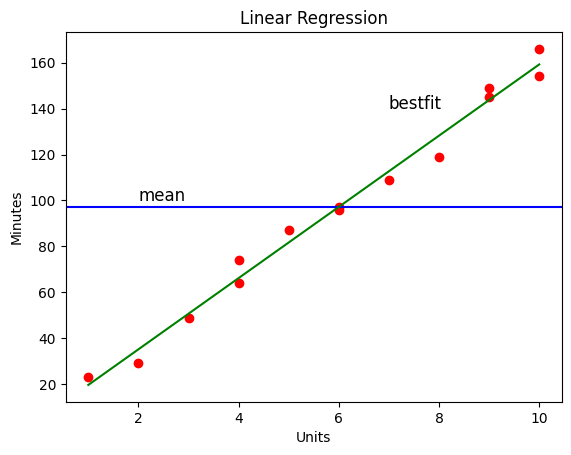

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df=pd.read_csv("/content/computers.csv")
df=pd.DataFrame(df)
print("Dataframe \n")
display(df.head())
print("---------------------------------------------------------------------------------------------------")
print("Average time taken \n")
mean=df["Minutes"].mean()
print(mean)
print("---------------------------------------------------------------------------------------------------")
x=df["Units"] #predictor
y=df["Minutes"] #label
model=LinearRegression()
model.fit(x.values.reshape(-1,1),y)
print("Performing Linear Regression \n")
print("Intercept: ",model.intercept_)
print("Coefficinets: ",model.coef_)
print("---------------------------------------------------------------------------------------------------")
print("adding predicted values to dataframe \n")
c=model.intercept_
m=model.coef_
df["predicted"]=c+m*df["Units"]
display(df.head())
print("---------------------------------------------------------------------------------------------------")
print("adding error column to dataframe \n")
df["error"]=df["predicted"]-df["Minutes"]
display(df.head())
print("---------------------------------------------------------------------------------------------------")
print("root mean squared error  \n")
print((sum(df["error"]**2)/len(df))**0.5)

fig,ax=plt.subplots()
ax.scatter(df["Units"],df["Minutes"],color="red")
ax.axhline(y=mean,c="b")
ax.plot(df["Units"],df["predicted"],c="g")
ax.set_xlabel("Units")
ax.set_ylabel("Minutes")
ax.set_title("Linear Regression")
plt.text(2,100, "mean", fontsize=12)
plt.text(7,140, "bestfit", fontsize=12)

# **logistic regression**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data="/content/pima-indians-diabetes.csv"
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df=pd.DataFrame(pd.read_csv(data,names=columns))
print("Dataframe \n")
display(df.head(2))
predictors=df.iloc[:,0:8]
target=df.iloc[:,-1]
print("Predictors \n")

display(predictors.head(2))
print("---------------------------------------------------------------------------------------------------")
print("Target \n")
display(target.head(2))
print("---------------------------------------------------------------------------------------------------")
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
print("Scaled Predictors \n")
display(pd.DataFrame(predictors_scaled).head(2))
print("---------------------------------------------------------------------------------------------------")
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("model score \n")
model.score(X_test,y_test)
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(" The confusion matrix is=")
print(cm)
print("---------------------------------------------------------------------------------------------------")
print("The accuracy score is=")
print(accuracy_score(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")
print(" The confusion matrix is in the graphical form")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/pima-indians-diabetes.csv'

 The confusion matrix is=
[[120  31]
 [ 30  50]]
---------------------------------------------------------------------------------------------------
The accuracy score is=
0.7359307359307359
---------------------------------------------------------------------------------------------------
 The confusion matrix is in the graphical form


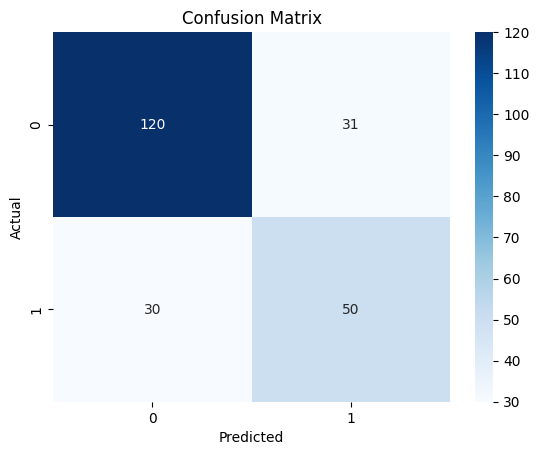

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(" The confusion matrix is=")
print(cm)
print("---------------------------------------------------------------------------------------------------")
print("The accuracy score is=")
print(accuracy_score(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")
print(" The confusion matrix is in the graphical form")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: find accuracy and prediction

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predictors and target variables defined as 'predictors' and 'target'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix (optional)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [144, 150]

# **naive base classifier**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("/content/iris.csv")
df=pd.DataFrame(data)
print("Dataframe \n")
display(df.head())
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

print("Encoded Dataframe \n")
display(df)
print("---------------------------------------------------------------------------------------------------")
predictors=df.iloc[:,0:4]
target=df.iloc[:,-1]
print("Predictors \n")
display(predictors.head())
print("---------------------------------------------------------------------------------------------------")
print("Target \n")
display(target.head())

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("model score \n")
model.score(X_test,y_test)
print("---------------------------------------------------------------------------------------------------")
print("The accuracy score is :")
print(accuracy_score(y_test, y_pred))

Dataframe 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Encoded Dataframe 



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


---------------------------------------------------------------------------------------------------
Predictors 



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


---------------------------------------------------------------------------------------------------
Target 



,species
0,0
1,0
2,0
3,0
4,0


model score 

---------------------------------------------------------------------------------------------------
The accuracy score is :
1.0


In [ ]:

sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

new_data = [[sepal_length, sepal_width, petal_length, petal_width]]


prediction = model.predict(new_data)

print("Predicted species:", prediction)


Enter sepal length: 3.2
Enter sepal width: 2.9
Enter petal length: 1.4
Enter petal width: 2
Predicted species: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# **Assignment**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = np.array([[1, 1, 9],
                 [2, 4, 6],
                 [3, 7, 4],
                 [4, 11, 4],
                 [5, 9, 2]])

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [ ]:
pca=PCA(n_components=2)
data_pca=pca.fit_transform(scaled_data)

In [ ]:
principal_components = pca.components_
print("Principal Components:")
print(principal_components)

print("\n Transformed data along the first two principal components: ")
print(data_pca)

Principal Components:
[[-0.58508358 -0.56897582  0.57787863]
 [-0.22234285  0.79781382  0.56040768]]

 Transformed data along the first two principal components: 
[[ 2.66842586  0.04992773]
 [ 1.04200355 -0.1445308 ]
 [-0.34022047 -0.10217387]
 [-1.39408485  0.63821667]
 [-1.97612409 -0.44143974]]


In [ ]:
# prompt: how to use label encoders

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data with a categorical feature
data = {'color': ['red', 'green', 'blue', 'red', 'green']}
df = pd.DataFrame(data)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'color' column
df['color_encoded'] = label_encoder.fit_transform(df['color'])

print(df)


# **Multilinear regression**


Mean Absolute Error (MAE): 4.8123507335380395
Mean Squared Error (MSE): 31.345957011258847
Root Mean Squared Error (RMSE): 5.5987460213211
R-squared (R2): 0.9957011258955988
Adjusted R-squared: 0.989252814738997

Prediction for new house (2000 sq ft, 3 bedrooms, 10 years old): $319861.82

Actual Prices vs Predicted Prices:
Actual Price: $300000.00 	 Predicted Price: $300823.95
Actual Price: $400000.00 	 Predicted Price: $395235.41
Actual Price: $350000.00 	 Predicted Price: $348602.87
Actual Price: $500000.00 	 Predicted Price: $507702.15
Actual Price: $450000.00 	 Predicted Price: $455910.95
Actual Price: $550000.00 	 Predicted Price: $541724.67


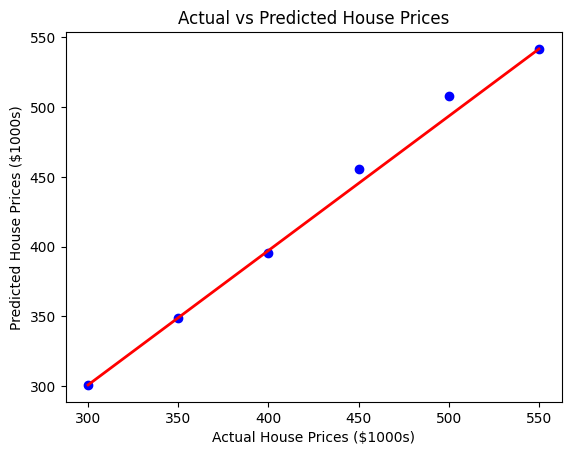

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Independent variables (Size in sq ft, Number of Bedrooms, Age of House in years)
X = np.array([[1500, 3, 10],[1800, 4, 15],[2400, 3, 20],[3000, 5, 8],[3500, 4, 12],[4000, 5, 5]])

# Dependent variable (House Price in $1000s)
Y = np.array([300, 400, 350, 500, 450, 550])
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
new_data = np.array([2000, 3, 10]).reshape(1, -1)
new_prediction = model.predict(new_data)
mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y, Y_pred)
n = len(Y)
k = X.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print(f"\nPrediction for new house (2000 sq ft, 3 bedrooms, 10 years old): ${new_prediction[0] * 1000:.2f}")

# Print actual vs predicted prices side by side
print("\nActual Prices vs Predicted Prices:")
for i in range(len(Y)):
    print(f"Actual Price: ${Y[i] * 1000:.2f} \t Predicted Price: ${Y_pred[i] * 1000:.2f}")

# Visualize the Results
# Plot actual vs predicted house prices
plt.scatter(Y, Y_pred, color='blue')
plt.plot([min(Y), max(Y)], [min(Y_pred), max(Y_pred)], color='red', linewidth=2)
plt.xlabel('Actual House Prices ($1000s)')
plt.ylabel('Predicted House Prices ($1000s)')
plt.title('Actual vs Predicted House Prices')
plt.show()


# **Naive Base**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Hot', 'Mild', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical variables to numeric (one-hot encoding)
df_encoded = pd.get_dummies(df.drop('PlayTennis', axis=1))
df_encoded['PlayTennis'] = df['PlayTennis'].map({'No': 0, 'Yes': 1})

# Split data into features (X) and target (y)
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

display(df_encoded.head())
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Display predicted probabilities for the test data
y_prob = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print()
# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Print the predicted probabilities for test data
print("\nPredicted Probabilities for Test Data:")
for i, probs in enumerate(y_prob):
    print(f"Instance {i+1}: No: {probs[0]:.4f}, Yes: {probs[1]:.4f}")

# Define a new instance using original categorical variables
new_instance = {
    'Outlook': ['Rain'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Windy': [True]
}

# Convert the new instance to match the one-hot encoded training data
new_instance_df = pd.DataFrame(new_instance)
new_instance_encoded = pd.get_dummies(new_instance_df)

# Ensure the new instance has the same columns as the training data
new_instance_encoded = new_instance_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the probability of the new instance
new_prob = model.predict_proba(new_instance_encoded)

# Predict the class label for the new instance
new_pred = model.predict(new_instance_encoded)

# Print the predicted probabilities for the new instance
print("\nPredicted Probabilities for New Instance:")
print(f"No: {new_prob[0][0]:.4f}, Yes: {new_prob[0][1]:.4f}")

# Print the final prediction for the new instance
final_prediction = "Yes" if new_pred[0] == 1 else "No"
print(f"\nFinal Prediction for New Instance: Play Tennis? {final_prediction}")


,Windy,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,PlayTennis
0,False,False,False,True,False,True,False,True,False,0
1,True,False,False,True,False,True,False,True,False,0
2,False,True,False,False,False,True,False,True,False,1
3,False,False,True,False,False,False,True,True,False,1
4,False,False,True,False,True,False,False,False,True,1



Accuracy: 0.8

Confusion Matrix:
 [[1 1]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


Predicted Probabilities for Test Data:
Instance 1: No: 0.0000, Yes: 1.0000
Instance 2: No: 0.0000, Yes: 1.0000
Instance 3: No: 1.0000, Yes: 0.0000
Instance 4: No: 0.0000, Yes: 1.0000
Instance 5: No: 0.0000, Yes: 1.0000

Predicted Probabilities for New Instance:
No: 0.0000, Yes: 1.0000

Final Prediction for New Instance: Play Tennis? Yes


# **SVM**

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Prediction for the new instance: s


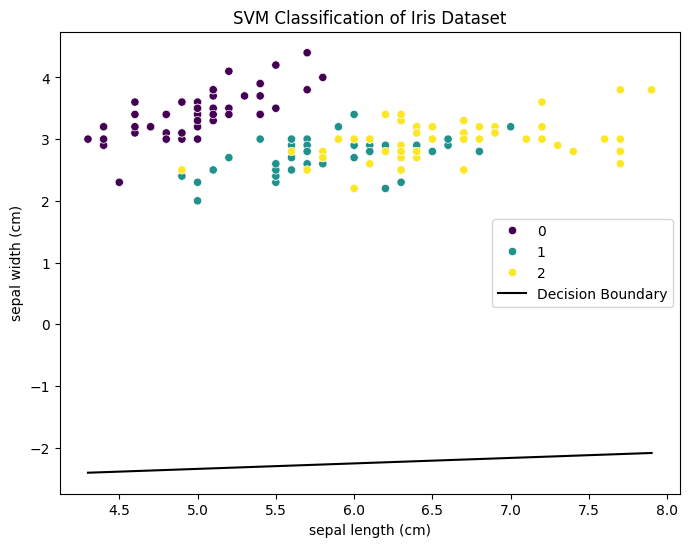

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Load the Iris dataset from sklearn
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = pd.Series(iris.target)  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

#  Display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

new_instance = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)

# Predict the class for the new instance
new_prediction = svm.predict(new_instance)

# Output the predicted class
print("Prediction for the new instance:", iris.target_names[new_prediction][0][0])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette="viridis")

# Plot the decision boundary (for linear kernel only in this example)
if svm.kernel == 'linear':
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max())
    yy = a * xx - (svm.intercept_[0]) / w[1]
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("SVM Classification of Iris Dataset")
plt.legend()
plt.show()

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



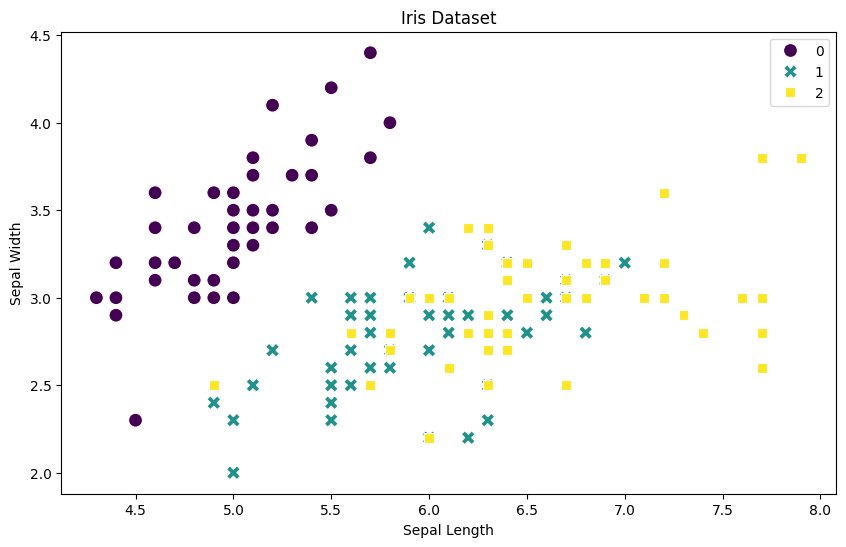

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
df=pd.read_csv("Iris.csv")
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can try 'rbf', 'poly', etc.

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Visualize the results (only works well with 2D data)
# Here we'll visualize the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', style=y, s=100)
plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



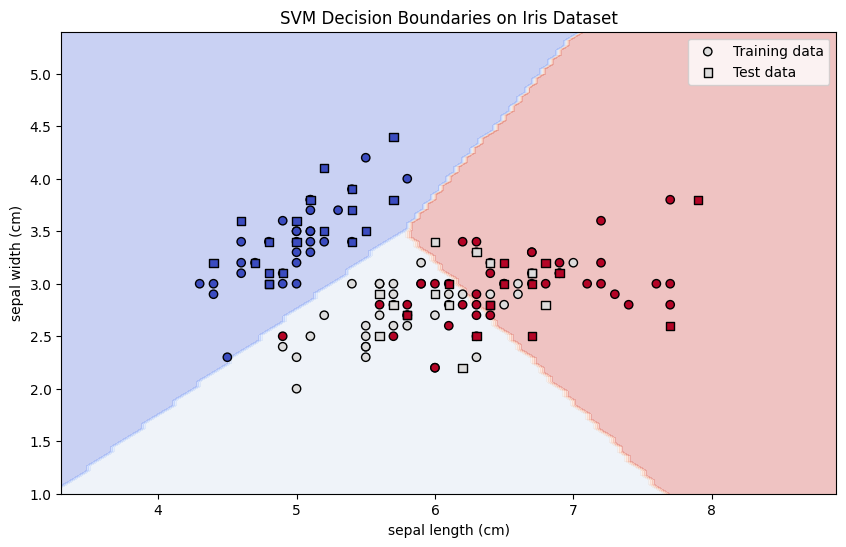

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training data', edgecolor='k', cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test data', edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundaries on Iris Dataset')
plt.legend()
plt.show()


# **KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
display(df.head())
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the K-Nearest Neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Define a new instance with specific feature values
new_instance = {
    'sepal length (cm)': [5.5],
    'sepal width (cm)': [2.6],
    'petal length (cm)': [4.4],
    'petal width (cm)': [1.2]
}

# Convert the new instance into a DataFrame
new_instance_df = pd.DataFrame(new_instance)

# Predict the class label for the new instance
new_pred = knn.predict(new_instance_df)

# Print the final prediction for the new instance
final_prediction = iris.target_names[new_pred[0]]
print(f"\nFinal Prediction for New Instance: {final_prediction}")


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Final Prediction for New Instance: versicolor


# **Decision Tree classfier**

In [ ]:
# prompt: decision tree classifier code

from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv('spambase.csv')
display(df.head())
predictors=df.iloc[:,0:57]
target=df.iloc[:,-1]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters here

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_req_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Decision Tree Accuracy: 0.9148566463944396
Confusion Matrix:
 [[623  53]
 [ 45 430]]


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv('spambase.csv')
display(df.head())
predictors=df.iloc[:,0:57]
target=df.iloc[:,-1]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with min_samples_split and min_impurity_decrease
clf = DecisionTreeClassifier(min_samples_split=4, min_impurity_decrease=0.01, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
print()
print("Test 1 with parameters min_samples_split=4, min_impurity_decrease=0.01, random_state=42 ")
print()
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
clf.fit(X_train, y_train)

# Get training and testing scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f"Decision Tree Training Score: {train_score}")
print(f"Decision Tree Testing Score: {test_score}")


clf2 = DecisionTreeClassifier(min_samples_split=7, min_impurity_decrease=0.001, random_state=42)
print()
print("Test 2 with parameters min_samples_split=7, min_impurity_decrease=0.001, random_state=42")
print()
# Fit the model on the training data
clf2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf2.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
clf2.fit(X_train, y_train)

# Get training and testing scores
train_score = clf2.score(X_train, y_train)
test_score = clf2.score(X_test, y_test)

print(f"Decision Tree Training Score: {train_score}")
print(f"Decision Tree Testing Score: {test_score}")

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_req_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Test 1 with parameters min_samples_split=4, min_impurity_decrease=0.01, random_state=42 

Accuracy: 87.95%
Decision Tree Training Score: 0.9
Decision Tree Testing Score: 0.8794788273615635

Test 2 with parameters min_samples_split=7, min_impurity_decrease=0.001, random_state=42

Accuracy: 92.29%
Decision Tree Training Score: 0.9543478260869566
Decision Tree Testing Score: 0.9229098805646037


# **Adaboost**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.datasets import load_iris  # This is not used
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # Added import for pandas


# Load the Iris dataset
df=pd.read_csv('spambase.csv')
display(df.head())
predictors=df.iloc[:,0:57]
target=df.iloc[:,-1]

# Split the data into training and testing sets
# Changed X and y to predictors and target
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier with Decision Tree stumps as weak learners
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42,algorithm='SAMME')

# Fit the model on the training data
ada_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_clf.predict(X_test)
print()
print("Test 1 with parameters n_estimators=50, random_state=42,algorithm='SAMME'")
print()
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



train_score = ada_clf.score(X_train, y_train)
print(f"Training Score: {train_score:.4f}")

# Calculate testing score
test_score = ada_clf.score(X_test, y_test)
print(f"Testing Score: {test_score:.4f}")


ada_clf2 = AdaBoostClassifier(n_estimators=20, random_state=42,algorithm='SAMME')
print()
print("Test 2 with parameters n_estimators=20, random_state=42,algorithm='SAMME' ")
print()
# Fit the model on the training data
ada_clf2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_clf2.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



train_score = ada_clf2.score(X_train, y_train)
print(f"Training Score: {train_score:.4f}")

# Calculate testing score
test_score = ada_clf2.score(X_test, y_test)
print(f"Testing Score: {test_score:.4f}")
from sklearn.metrics import classification_report
print("Classification Report for ada_clf (n_estimators=50):")
print(classification_report(y_test, y_pred))

# For ada_clf2
print("\nClassification Report for ada_clf2 (n_estimators=20):")
print(classification_report(y_test, y_pred))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_req_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Test 1 with parameters n_estimators=50, random_state=42,algorithm='SAMME'

Accuracy: 92.62%
Training Score: 0.9342
Testing Score: 0.9262

Test 2 with parameters n_estimators=20, random_state=42,algorithm='SAMME' 

Accuracy: 90.88%
Training Score: 0.9101
Testing Score: 0.9088
Classification Report for ada_clf (n_estimators=50):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       531
           1       0.90      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921


Classification Report for ada_clf2 (n_estimators=20):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       531
           1       0.90      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Spambase dataset
df = pd.read_csv('spambase.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter set 1
rf_classifier1 = RandomForestClassifier(n_estimators=12, max_depth=20, random_state=42)
rf_classifier1.fit(X_train, y_train)
y_pred_test1 = rf_classifier1.predict(X_test)
y_pred_train1 = rf_classifier1.predict(X_train)
accuracy_test1 = accuracy_score(y_test, y_pred_test1)
accuracy_train1 = accuracy_score(y_train, y_pred_train1)

print("Hyperparameter Set 1:", "(n_estimators=12, max_depth=20, random_state=42)")
print(f"Test Data Accuracy: {accuracy_test1}")
print(f"Train Data Accuracy: {accuracy_train1}")
print(classification_report(y_test, y_pred_test1))

# Hyperparameter set 2
rf_classifier2 = RandomForestClassifier(n_estimators=20, max_depth=30, random_state=0)
rf_classifier2.fit(X_train, y_train)
y_pred_test2 = rf_classifier2.predict(X_test)
y_pred_train2 = rf_classifier2.predict(X_train)
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
accuracy_train2 = accuracy_score(y_train, y_pred_train2)

print("\nHyperparameter Set 2:", "(n_estimators=20, max_depth=30, random_state=0)")
print(f"Test Data Accuracy: {accuracy_test2}")
print(f"Train Data Accuracy: {accuracy_train2}")
print(classification_report(y_test, y_pred_test2))

Hyperparameter Set 1: (n_estimators=12, max_depth=20, random_state=42)
Test Data Accuracy: 0.944243301955105
Train Data Accuracy: 0.991304347826087
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       804
           1       0.95      0.91      0.93       577

    accuracy                           0.94      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.94      0.94      0.94      1381


Hyperparameter Set 2: (n_estimators=20, max_depth=30, random_state=0)
Test Data Accuracy: 0.9507603186097031
Train Data Accuracy: 0.9972049689440994
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       804
           1       0.96      0.92      0.94       577

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



CLUSETRING

# **K means**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Mall_customers.csv')
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('Mall_customers.csv')
label_encoder = LabelEncoder()
# Select features for clustering

data['Gender'] = label_encoder.fit_transform(df['Gender'])
features = data[['Gender','Annual Income (k$)', 'Spending Score (1-100)']]
display(data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


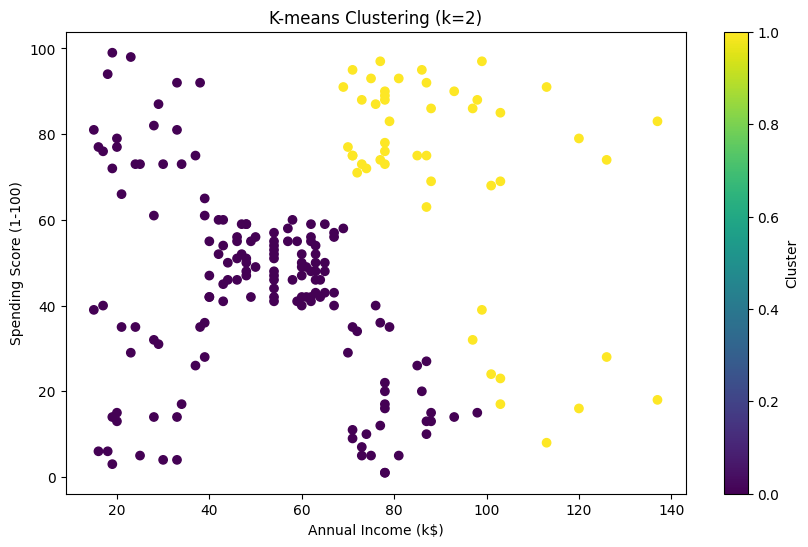

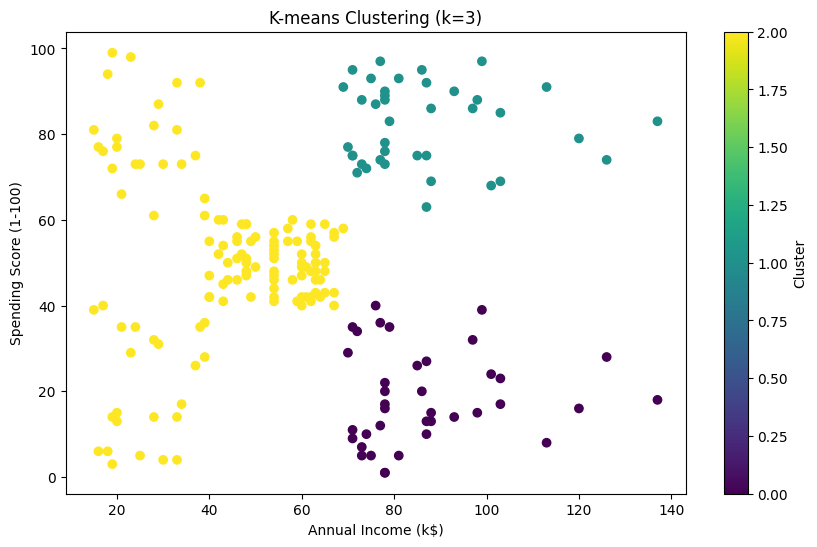

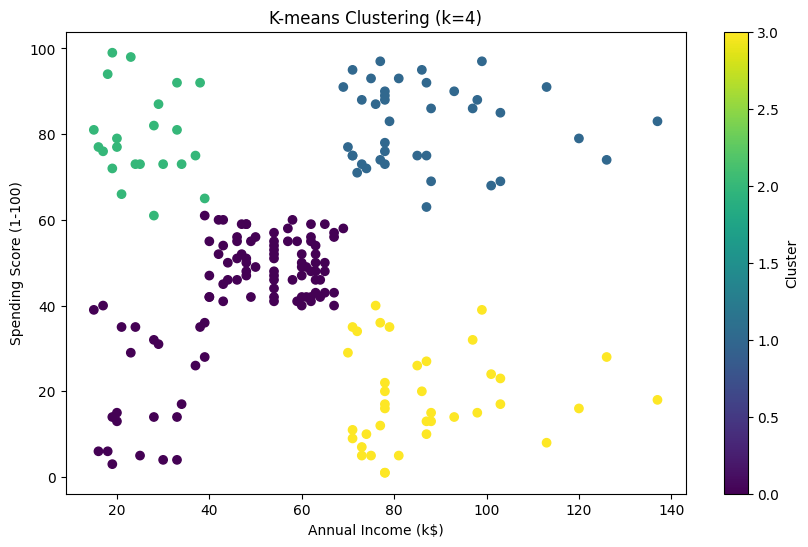

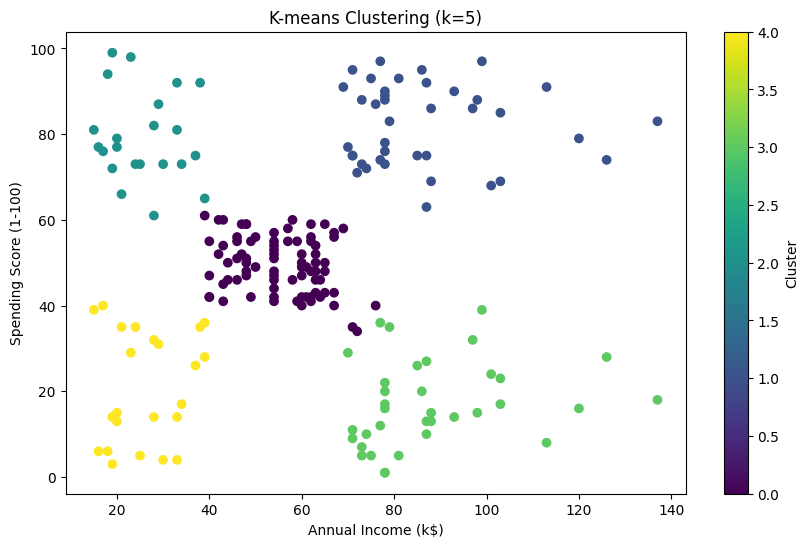

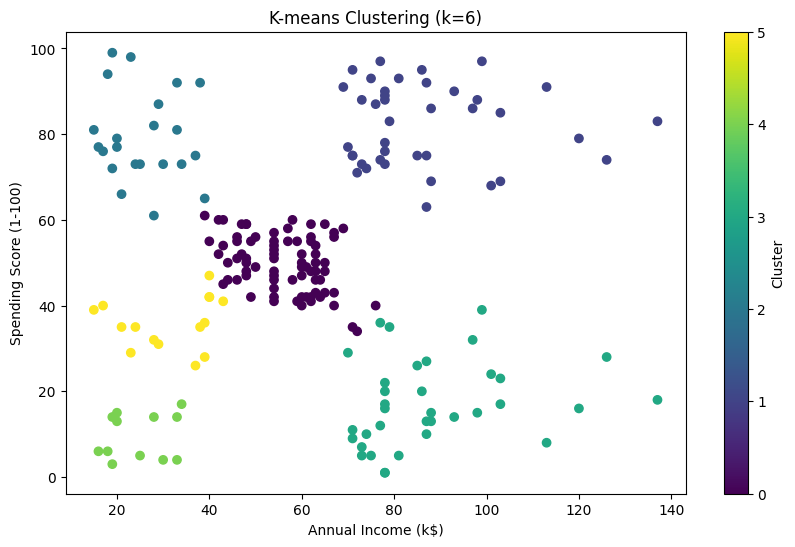

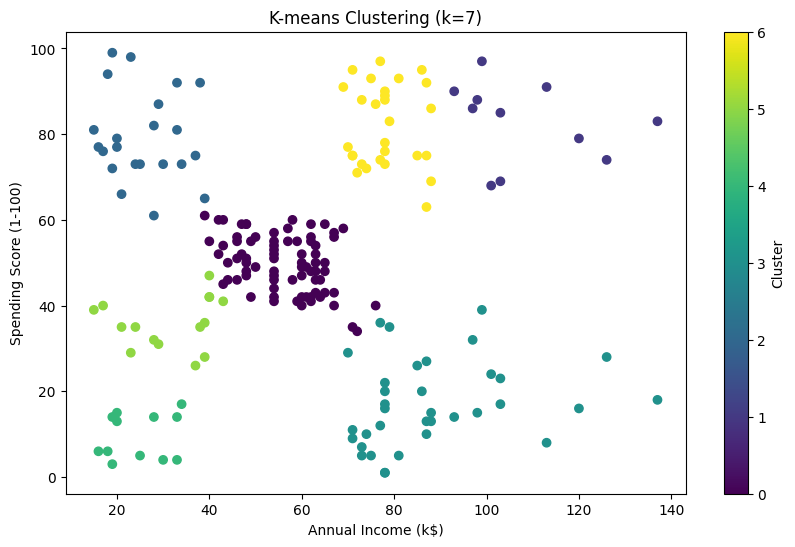

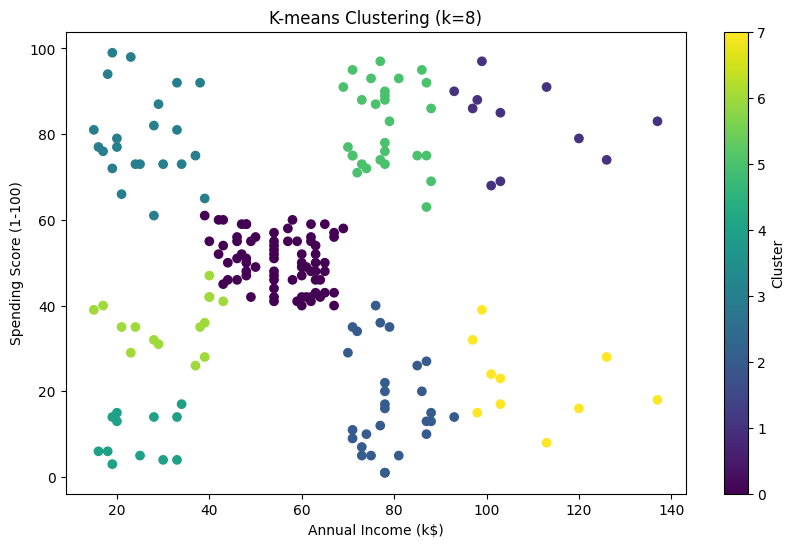

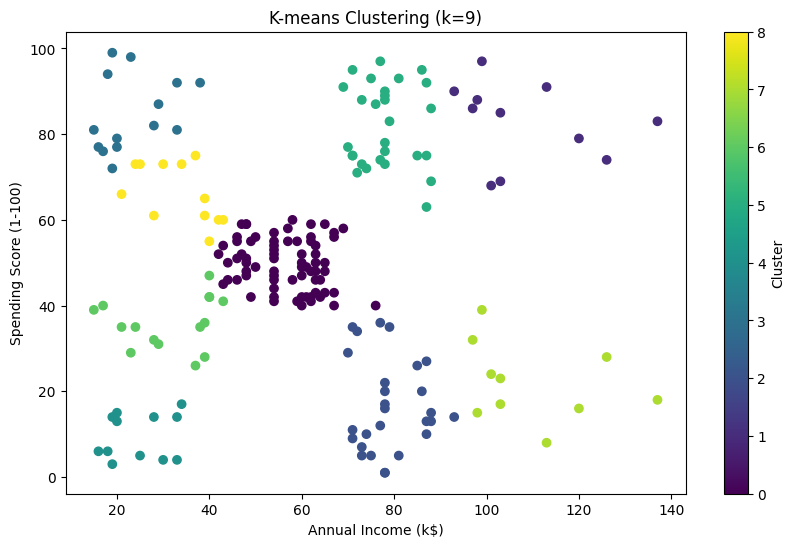

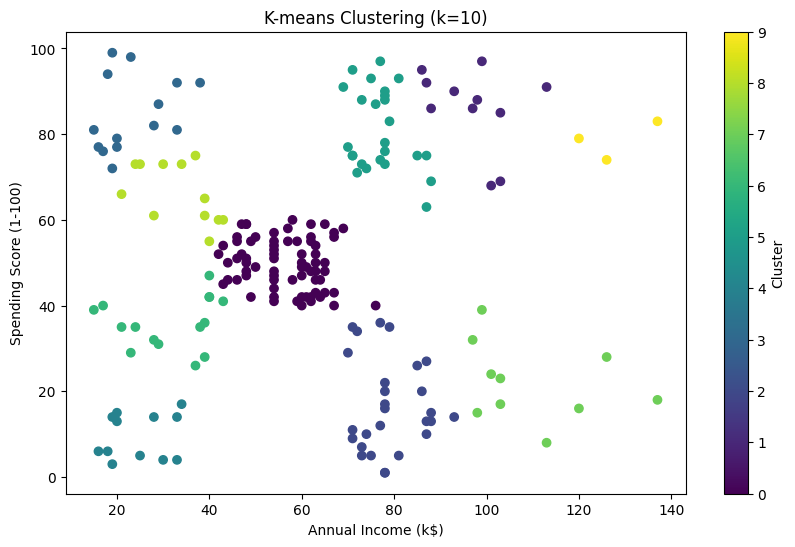

In [ ]:
k_values = range(2, 11)
for k in k_values:
    # Fit K-means with current k
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(features)

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar(label='Cluster')
    plt.show()

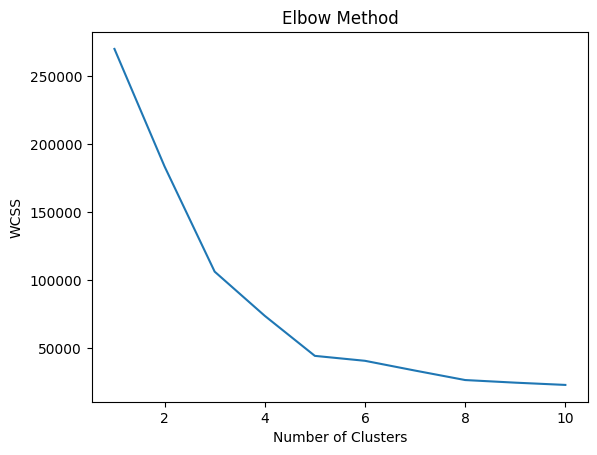

In [ ]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'features' DataFrame from your previous code
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# **dbscan**

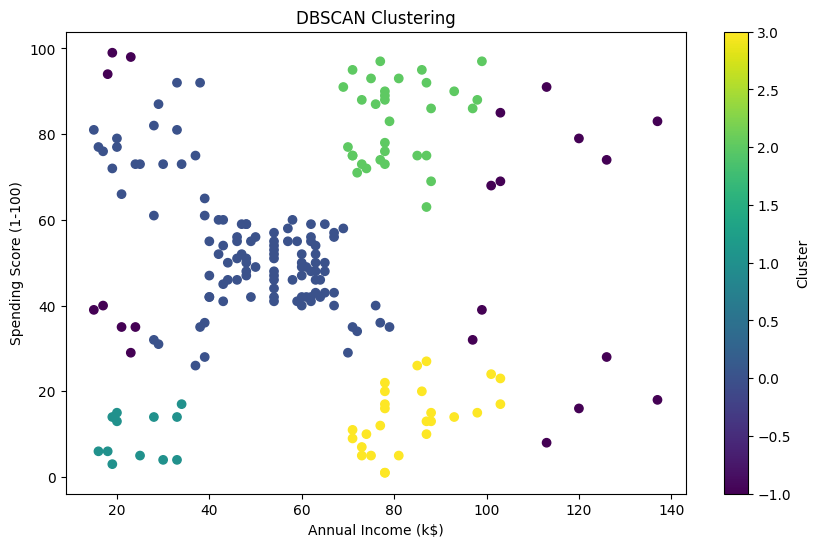

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Load your dataset
df = pd.read_csv('Mall_customers.csv')
# df['Gend'] = label_encoder.fit_transform(df['Gender'])
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

# **Agglomerative**

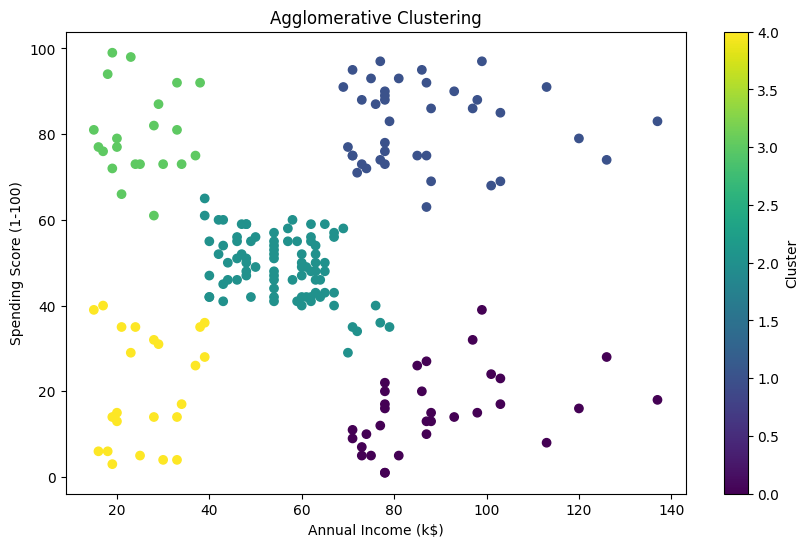

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Load and preprocess data
data = pd.read_csv('Mall_customers.csv')
label_encoder = LabelEncoder()
# data['Gender'] = label_encoder.fit_transform(data['Gender'])
# X = data[['Gender','Annual Income (k$)', 'Spending Score (1-100)']]
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

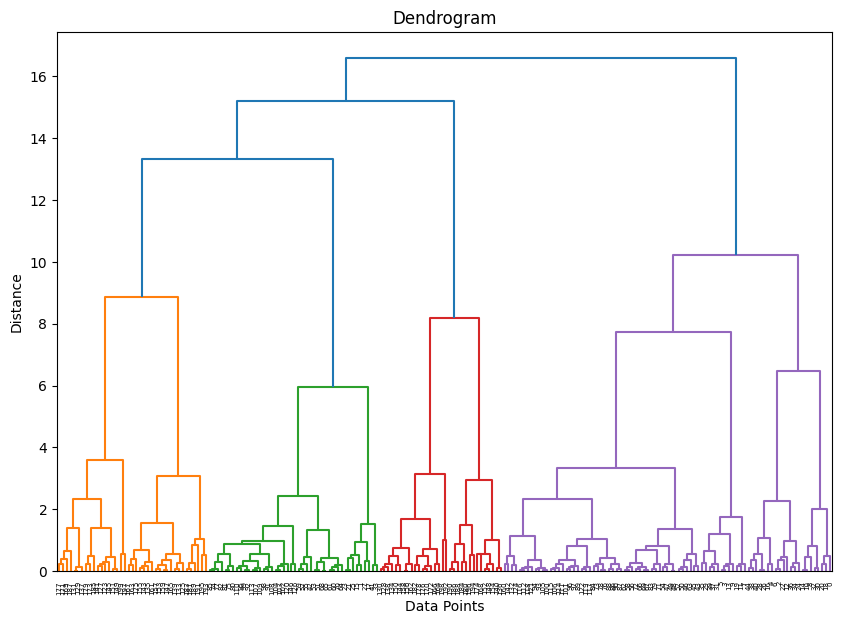

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming your data is in the 'features' DataFrame
# features = data[['Gender','Annual Income (k$)', 'Spending Score (1-100)']]
# If not, replace with your actual DataFrame

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering using linkage
linked = linkage(scaled_features, method='ward')  # You can change the method (e.g., 'single', 'complete', 'average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()